<center> </center>

<center><font size=5 face="Helvetica" color=#76B900><b>
Mandelbrot Set
</b></font></center>

<center><font face="Helvetica" size=3><b>Ang Chen</b></font></center>
<center><font face="Helvetica" size=3>November, 2025</font></center>

***

# Import libraries

In [11]:
from time import time
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
import numpy as np
import scipy.io

# load MATLAB colormap: parula
mat = scipy.io.loadmat("../parula.mat")
parula_rgb = mat["P"]
parula_map = ListedColormap(parula_rgb)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Define functions

In [12]:
def simple_mandelbrot(
    width, height, real_low, real_high, imag_low, imag_high, max_iters, upper_bound
):
    """
    This function is used for generating Mandelbrot set graph.

    Args:
        width (int): point number of width
        height (int): point number of height
        real_low (float): lower limit of real axis
        real_high (float): high limit of real axis
        imag_low (float): lower limit of imaginary axis
        imag_high (float): higher limit of imaginary axis
        max_iters (int): maximum iteration number
        upper_bound (float): upper bound of absolute value of complex number

    Returns:
        numpy.ndarray: Mandelbrot set graph
    """
    real_vals = np.linspace(real_low, real_high, width) # x-axis values
    imag_vals = np.linspace(imag_low, imag_high, height) # y-axis values
    mandelbrot_graph = np.ones((height, width), dtype=np.float32) # initialize Mandelbrot set graph as 1    

    for x in range(width): 

        for y in range(height):
            c = np.complex64(real_vals[x] + imag_vals[y] * 1j) # complex number
            z = np.complex64(0) # initialize complex number as 0

            for _ in range(max_iters):
                z = z**2 + c # calculate z^2 + c
                if np.abs(z) > upper_bound: # if absolute value of z is greater than upper bound, set pixel value as 0 and break loop
                    mandelbrot_graph[y, x] = 0
                    break

    return mandelbrot_graph

# Do the test

## The input parameters

In [13]:
width, height = 512, 512
real_low, real_high = -2, 2
imag_low, imag_high = -2, 2

max_iters = 256
upper_bound = 2.5 

In [14]:
t11 = time()
mandel = simple_mandelbrot(width=width,
                           height=height, real_low=real_low, 
                           real_high=real_high, 
                           imag_low=imag_low, imag_high=imag_high, 
                           max_iters=max_iters, 
                           upper_bound=upper_bound)
t12 = time()

print(f"Elapsed time of generate the data is {t12-t11:.8f} seconds.")

Elapsed time of generate the data is 2.89886165 seconds.


Elapsed time of plotting the data is 0.01362801 seconds.


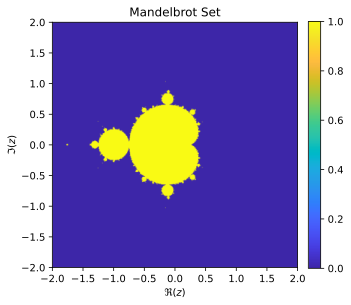

In [15]:
t21 = time()
fig, ax = plt.subplots(1, 1, figsize=(5 * 1, 5 * 1))
im = ax.imshow(
    mandel, extent=(real_low, real_high, imag_low, imag_high), cmap=parula_map
)
ax.set_xlabel(r"$\Re(z)$")
ax.set_ylabel(r"$\Im(z)$")
ax.set_title("Mandelbrot Set")
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

t22 = time()

print(f"Elapsed time of plotting the data is {t22-t21:.8f} seconds.")
fig.tight_layout()